# Airline passengers example

This is a data set of the monthly number of passengers on a US airline from 1949 till 1960. It contains a clear periodicity due to seasonal fluctuations in passenger numbers. We will model this data set using a single output spectral mixture kernel and verify if we can capture the periodicities. Additionally, we'll remove the upward trend using a linear regression and further improve results by training the logarithm of the data.

In [1]:
import mogptk
import numpy as np

Loading the airline passenger data into MOGPTK.

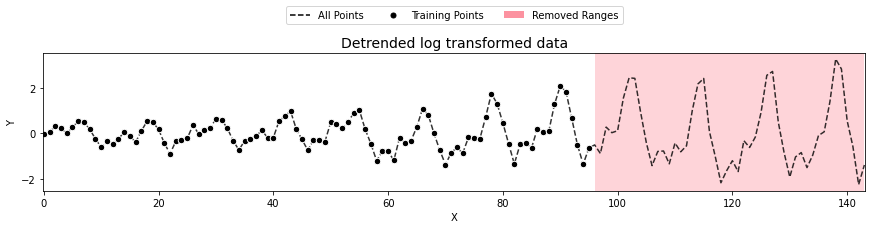

In [17]:
air = np.loadtxt('data/Airline_passenger.csv')
x = air[: ,0]
y = air[:, 1]
stop = 96

# add data
data = mogptk.Data(x, y, name='Airline')
data.transform(mogptk.TransformDetrend(degree=2))
data.transform(mogptk.TransformStandard())
data.remove_range(x[stop], None)

# create model
model = mogptk.SM(data, Q=10)
data.plot(title='Detrended log transformed data', transformed=True);

Initialize the model using BNSE for each of the 10 mixtures.

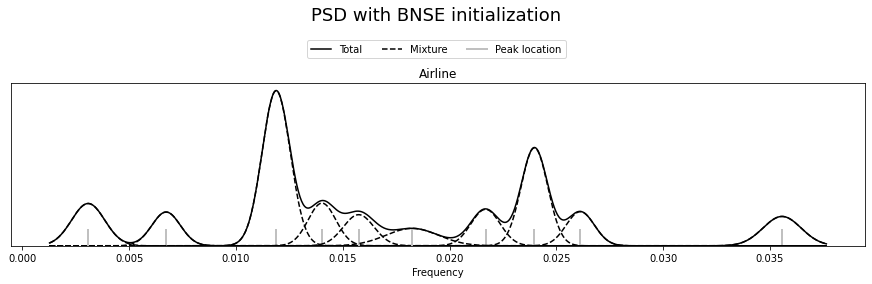

In [18]:
method = 'BNSE'
model.init_parameters(method)
model.plot_spectrum(title='PSD with {} initialization'.format(method));

We can see that the largest peak is around a yearly patterns and half-yearly patterns, e.g. $\frac{1}{12} = 0.083$ and $\frac{1}{6} = 0.17$ respectively.

We will now train the model using the Adam optimizer and plot its predictions.

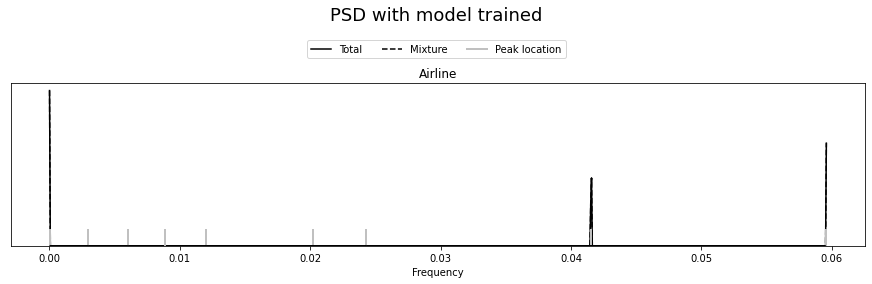

In [22]:
model.train('Adam', iters=1000, lr=0.1)
model.plot_spectrum(title='PSD with model trained');

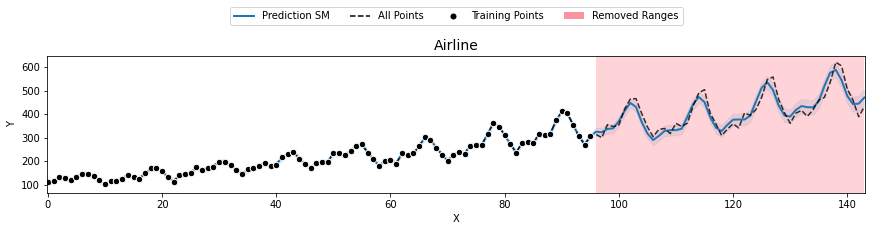

In [25]:
model.predict()
data.plot();